### Q1
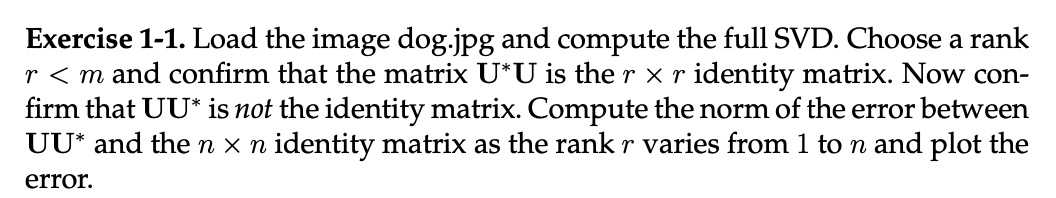

True
False


Text(0.5, 1.0, 'rank vs errors')

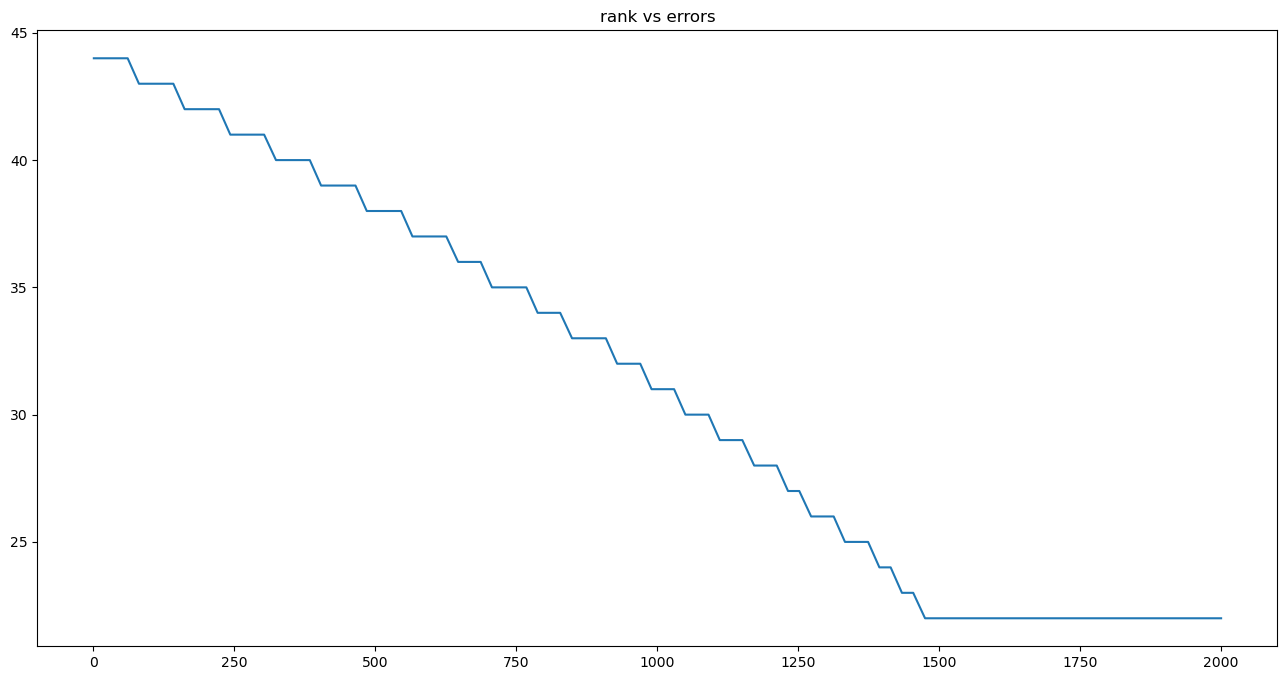

In [21]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]


A = imread(os.path.join('..','DATA','dog.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale
r = 500
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)
U_r = U[:,:r]
n = U.shape[0]
print(np.allclose(np.identity(r),np.matmul(U_r.T,U_r)))
print(np.allclose(np.identity(n),np.matmul(U_r,U_r.T)))
ranks = np.linspace(1,n,100).astype(np.int16)
errors = np.zeros_like(ranks)
for i, r in enumerate(ranks):
    errors[i] = np.linalg.norm(np.identity(n) - np.matmul(U[:,:r], U[:,:r].T))
plt.plot(ranks, errors)
plt.title('rank vs errors')

### Q2
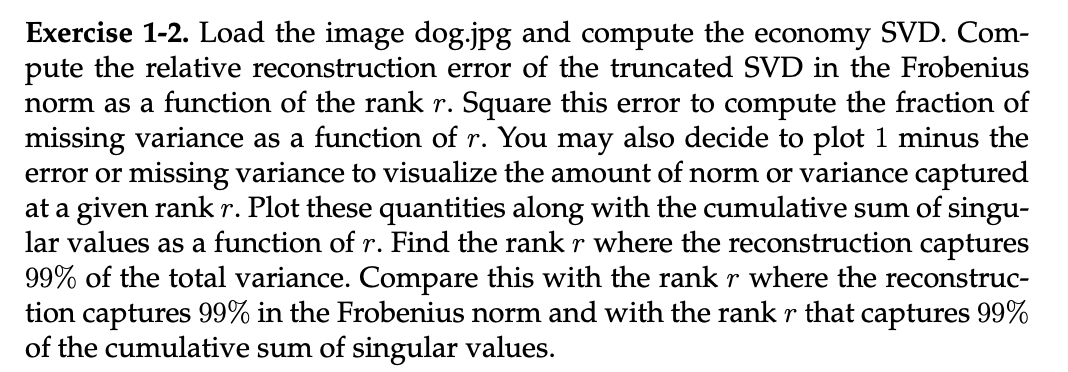

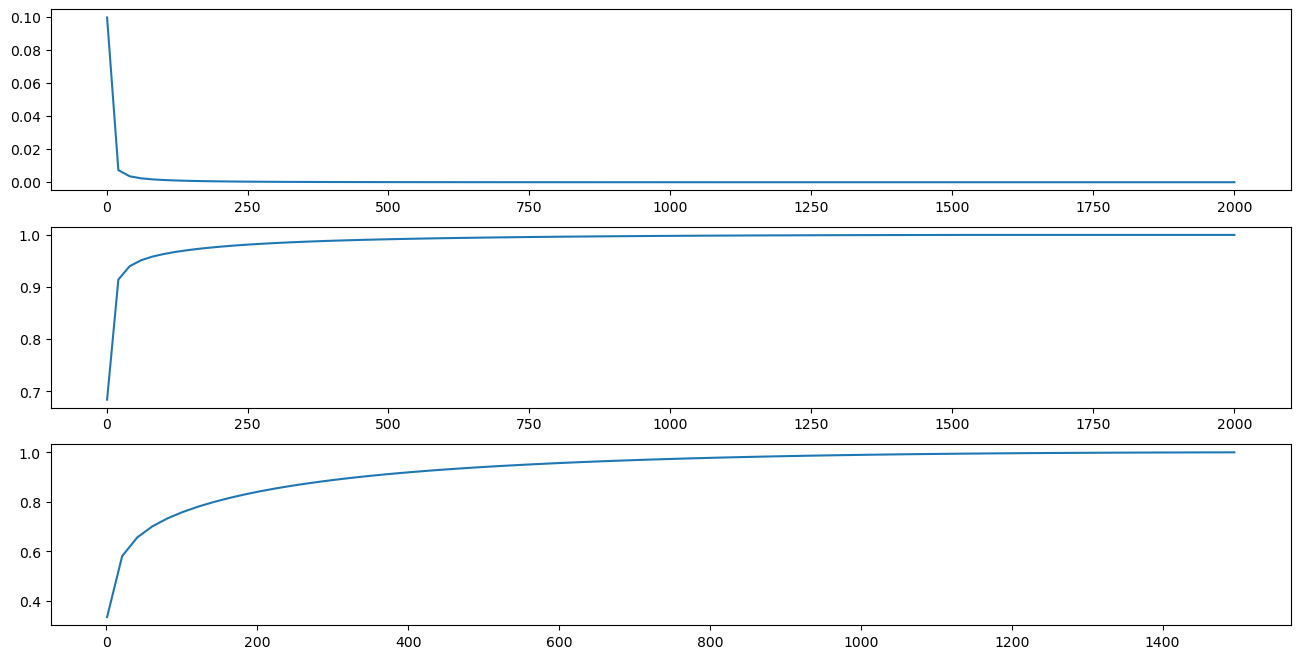

In [48]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
n = U.shape[0]
full_error =  np.linalg.norm(X)
ranks = np.linspace(1,n,100).astype(np.int16)
errors = np.zeros_like(ranks).astype(np.float64)
S_mat = np.diag(S)
for i, r in enumerate(ranks):
    Xhat = U[:,:r] @ S_mat[0:r,:r] @ VT[:r,:]
    errors[i] = np.linalg.norm(X-Xhat)/full_error
errors_sq = np.power(errors,2)
fig, axs = plt.subplots(3,1)
axs[0].plot(ranks, errors_sq)
axs[1].plot(ranks, 1-errors)
axs[2].plot(ranks[ranks<1500], S.cumsum()[ranks[ranks<1500]]/S.sum())

In [63]:
ranks[np.argwhere(1-errors>0.99)[0]], ranks[np.argwhere(S.cumsum()[ranks[ranks<1500]]/S.sum()>0.99)[0]]

(array([445], dtype=int16), array([1010], dtype=int16))

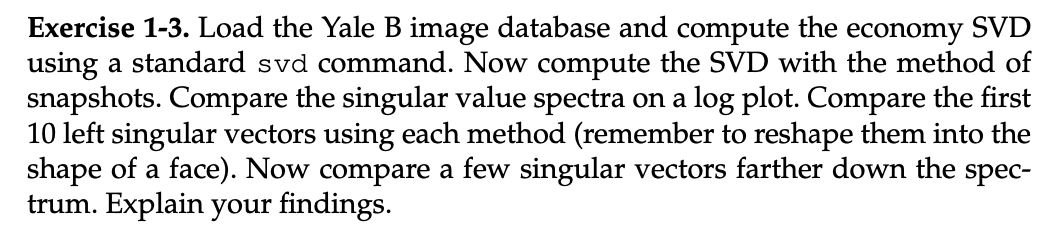

In [64]:
import scipy.io
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat(os.path.join('..','DATA','allFaces.mat'))
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

# We use the first 36 people for training data
trainingFaces = faces[:,:np.sum(nfaces[:36])]
avgFace = np.mean(trainingFaces,axis=1) # size n*m by 1

# Compute eigenfaces on mean-subtracted training data
X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[1],1)).T
U, S, VT = np.linalg.svd(X,full_matrices=0)


/var/folders/rj/327zgtd959z0mfhpndqfssx00000gq/T/ipykernel_57491/889172489.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(mat_contents['m'])
/var/folders/rj/327zgtd959z0mfhpndqfssx00000gq/T/ipykernel_57491/889172489.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(mat_contents['n'])


(32256,)

In [67]:
np.tile?

Signature:       np.tile(A, reps)
Call signature:  np.tile(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function tile at 0x1149e82c0>
File:            ~/miniconda3/envs/databook/lib/python3.12/site-packages/numpy/lib/shape_base.py
Docstring:      
Construct an array by repeating A the number of times given by reps.

If `reps` has length ``d``, the result will have dimension of
``max(d, A.ndim)``.

If ``A.ndim < d``, `A` is promoted to be d-dimensional by prepending new
axes. So a shape (3,) array is promoted to (1, 3) for 2-D replication,
or shape (1, 1, 3) for 3-D replication. If this is not the desired
behavior, promote `A` to d-dimensions manually before calling this
function.

If ``A.ndim > d``, `reps` is promoted to `A`.ndim by pre-pending 1's to it.
Thus for an `A` of shape (2, 3, 4, 5), a `reps` of (2, 2) is treated as
(1, 1, 2, 2).

Note : Although tile may be used for broadcasting, it is strongly
recommended to use numpy's broadcasting operation